In [39]:
# We will learn the theory of Linear Regression and partly Model Validation & Hyperparameter tunning. 
# Finally we will predict adjusted stock price of Amazon for 30 days using previous adjusted price. (Univariate linear Regression)
 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


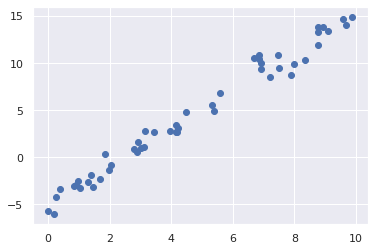

In [0]:
# y = a*x + b, is the simplest form of linear regression
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

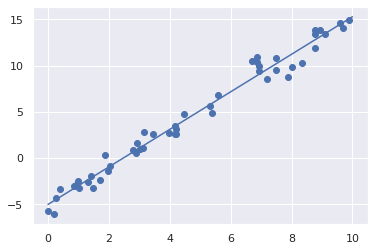

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [0]:
# Slope and Intercept are model's fit parameters
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


In [0]:
# We can scale linear Regression to many dimensions, In a multi dimensional space we can use "Hyperplane" to predict the target variable
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
# Y is being modelled from 3 X variables
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


In [0]:
# Model Validation Using Holdout Technique

''' We need to do model validation using holdout sets, we hold back some subset of the data from the training of the model, 
and then use this holdout set to check the model performance. This splitting can be done using the train_test_split utility in
 Scikit-Learn: (Example code)

from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2) # Predicting the holdout data using the model
accuracy_score(y2, y2_model) # Checking the accuracy score b/w predicted and actual lables of holdout data.
'''
# One disadvantage in holding data is it maybe reduce the amount of available data.This is not optimal, and can
# cause problems – especially if the initial set of training data is small.

# Model Validation using Cross Validation technique.
'''
One way to address this is to use cross-validation; that is, to do a sequence of fits where each subset of the data is used both 
as a training set and as a validation set. Visually, it might look something like this:

trail 1 : 50% Training, 50% Validation
trail 2 : 50% Validation, 50% Training

y2_model = model.fit(X1, y1).predict(X2) # We are using model to fit both parts of data and validate it both ways.
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model) # We can combine these accuracies to observe global performance.
# We can use 2fold (like above), or 5fold cross validation technique.

from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)

#Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm.

'''
# Cross Validation using leave-one-out Method
'''
scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations; these are implemented via 
iterators in the cross_validation module. For example, we might wish to go to the extreme case in which our number of folds is equal to 
the number of data points: that is, we train on all points but one in each trial. This type of cross-validation is known as 
leave-one-out cross validation.

from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))'''


In [0]:
# Model Selection 
'''
Sometimes using a simple model yields better results than a complex model. Reducing unimportant parameters also helps very much it creating an efficient model
'''
# Bias-Varience Tradeoff
'''
  High Bias - Underfits the model (Performance on Training is similar to Test data)
  High Varience - Overfits the model (Captures a lot of noise), (Performace of traning is far better than test data)
'''
# The score here is the  𝑅2  score, or coefficient of determination, which measures how well a model performs relative to a simple mean
# of the target values.
''' 
  sqr(R) = 1, perfect model
  sqr(R) = 0, Means the model does no better than simply taking the mean of the data.
A best model usually will perform optimally when the complexity of the model is medium and the accuracy is at its peak, but is the model 
has too high bias then it will underfit and be very generalized'''

# Validation Curve for deciding on the model
'''
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');  '''

# Learning Curve General Behavior
# * A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, 
#       while the validation score will be relatively low.
# * A model of a given complexity will underfit a large dataset: this means that the training score
#       will decrease, but the validation score will increase.
# * A model will never, except by chance, give a better score to the validation set than the training set: 
#        this means the curves should keep getting closer together but never cross.

''' This is a valuable diagnostic, because it gives us a visual depiction of how our model responds to increasing training data. 
In particular, when your learning curve has already converged (i.e., when the training and validation curves are already close 
to each other) adding more training data will not significantly improve the fit! This situation is seen in the left panel, with the 
learning curve for the degree-2 model.'''

'''
The only way to increase the converged score is to use a different (usually more complicated) model. We see this in the right panel: 
by moving to a much more complicated model, we increase the score of convergence (indicated by the dashed line), but at the expense 
of higher model variance (indicated by the difference between the training and validation scores). If we were to add even more data 
points, the learning curve for the more complicated model would eventually converge.
'''

# Validation in practice
'''
In practice, models generally have more than one knob to turn, and thus plots of validation and learning curves change from lines to
 multi-dimensional surfaces. In these cases, such visualizations are difficult and we would rather simply find the particular model 
 that maximizes the validation score.

Scikit-Learn provides automated tools to do this in the grid search module. 

from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y);
grid.best_params_'''


"\nIn practice, models generally have more than one knob to turn, and thus plots of validation and learning curves change from lines to\n multi-dimensional surfaces. In these cases, such visualizations are difficult and we would rather simply find the particular model \n that maximizes the validation score.\n\nScikit-Learn provides automated tools to do this in the grid search module. \n\nfrom sklearn.grid_search import GridSearchCV\n\nparam_grid = {'polynomialfeatures__degree': np.arange(21),\n              'linearregression__fit_intercept': [True, False],\n              'linearregression__normalize': [True, False]}\n\ngrid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)\ngrid.fit(X, y);\ngrid.best_params_"

In [0]:
# Feature Engineering
'''
Real World data is very messy, its not very welcoming at first sight, so we use feature engineering techiniques to make our model efficient and efficient
We usually build our feature matrix, lets understand feature engineering for different aspect of data.'''

#  1) Categorical Data
# Consider data of house pricing and we have neighbourhood data which is categorical
# Inorder to effectively represent the categorical data mathematically, we can use One-hot Encoding, which create additional columns
# It indicate the presence or absence of a category by encoding it with 1 or 0
'''
  data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
] '''
# When data comes as dictionary datatype, we can use DictVectorizer to apply one-hot encoding
'''from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data) '''

''' O/P :
array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)  
  
Notice that the 'neighborhood' column has been expanded into three separate columns, representing the three neighborhood labels,
and that each row has a 1 in the column associated with its neighborhood. With these categorical features thus encoded,
you can proceed as normal with fitting a Scikit-Learn model.'''

# To get the names of actual features:
# vec.get_feature_names()
# Although it looks exhausting, we can use sparse option as majority of it has zeroes
'''
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data) # We can use 'One hot Encoder' or 'Feature Hasher' to handle feature data '''

 
# 2) Textual Data
# The simplest Idea to convert text data to numerical data is to bucket each word into its word counts
'''
sample = ['problem of evil',
          'evil queen',
          'horizon problem']
# We can use CountVectorizer to convert the above sample text in to buckets
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

Output:   
    evil	horizon	of	problem	queen
0	    1	    0	     1	  1	      0
1	    1	    0	     0	  0	      1
2	    0	    1	     0	  1	      0

There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that 
appear very frequently, and this can be sub-optimal in some classification algorithms. One approach to fix this is known as 
term frequency-inverse document frequency (TF–IDF) which weights the word counts by a measure of how often they appear in the documents. 
'''
# Term-Frequency-Inverse-Document-Frequency (TF-IDF)
'''
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
'''

# Image Features
# Usually the best ideal way is to perform computations on Pixel Values, But depending on the application this approach might not be optimal

# Derived Features
# Usually converting polynomial features by transforming the input
'''%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);'''

# Fitting it to linear regression 
'''
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);  '''

# Insearch for a more sophisticated model we can add extra column with polynomial features of input data
'''
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);
'''


'\nfrom sklearn.preprocessing import PolynomialFeatures\npoly = PolynomialFeatures(degree=3, include_bias=False)\nX2 = poly.fit_transform(X)\nprint(X2)\n\nmodel = LinearRegression().fit(X2, y)\nyfit = model.predict(X2)\nplt.scatter(x, y)\nplt.plot(x, yfit);\n'

In [0]:
# Imputting Missing data using Feature Engineering
from numpy import nan
import numpy as np
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [0]:
# We can replace these missing values by simply replacing it with mean of the column or use more sophisticated approach of using domain 
# knowledge to replace the missing data
# Inorder to impute mean, median, mode we can use 'Imputer' class
'''
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2'''

"\nfrom sklearn.preprocessing import Imputer\nimp = Imputer(strategy='mean')\nX2 = imp.fit_transform(X)\nX2"

In [0]:
# It seems very tedious task to replace the missing values or perform feature engineering by hand, so in order to streamline such process
# we can use a processing pipeline for such tasks 
'''
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))'''

"\nfrom sklearn.pipeline import make_pipeline\n\nmodel = make_pipeline(Imputer(strategy='mean'),\n                      PolynomialFeatures(degree=2),\n                      LinearRegression())\nmodel.fit(X, y)  # X with missing values, from above\nprint(y)\nprint(model.predict(X))"

In [0]:
# Gaussian Basic Functions
# one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases. ( Adding the bases of normal distributions and combining them)
'''from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);'''

'from sklearn.base import BaseEstimator, TransformerMixin\n\nclass GaussianFeatures(BaseEstimator, TransformerMixin):\n    """Uniformly spaced Gaussian features for one-dimensional input"""\n    \n    def __init__(self, N, width_factor=2.0):\n        self.N = N\n        self.width_factor = width_factor\n    \n    @staticmethod\n    def _gauss_basis(x, y, width, axis=None):\n        arg = (x - y) / width\n        return np.exp(-0.5 * np.sum(arg ** 2, axis))\n        \n    def fit(self, X, y=None):\n        # create N centers spread along the data range\n        self.centers_ = np.linspace(X.min(), X.max(), self.N)\n        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])\n        return self\n        \n    def transform(self, X):\n        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,\n                                 self.width_, axis=1)\n    \ngauss_model = make_pipeline(GaussianFeatures(20),\n                            LinearRegression())\ngauss_

In [0]:
# Regularization 
# Sometimes basic functions can also overfit the data, ex: too many gaussian bases might also overfit the data
'''model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);'''

'''
# Basis_polt gives the deviation of curve from reality or amplitude of basis function at each location
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model) '''

"\n# Basis_polt gives the deviation of curve from reality or amplitude of basis function at each location\ndef basis_plot(model, title=None):\n    fig, ax = plt.subplots(2, sharex=True)\n    model.fit(x[:, np.newaxis], y)\n    ax[0].scatter(x, y)\n    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))\n    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))\n    \n    if title:\n        ax[0].set_title(title)\n\n    ax[1].plot(model.steps[0][1].centers_,\n               model.steps[1][1].coef_)\n    ax[1].set(xlabel='basis location',\n              ylabel='coefficient',\n              xlim=(0, 10))\n    \nmodel = make_pipeline(GaussianFeatures(30), LinearRegression())\nbasis_plot(model) "

In [0]:
# Ridge regression ( 𝐿2  Regularization)
'''
Perhaps the most common form of regularization is known as ridge regression or  𝐿2  regularization, sometimes also called Tikhonov 
regularization. This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the 
model fit would be
                      𝑃=𝛼 ∑ sqr(𝜃) (from n=1 to N)

where 𝛼 is a free parameter that controls the strength of the penalty. This type of penalized model is built into Scikit-Learn with the Ridge estimator:

from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression') '''

# 𝛼 Parameter
''' 
The  𝛼  parameter is essentially a knob controlling the complexity of the resulting model.
In the limit  𝛼→0 , we recover the standard linear regression result; in the limit  𝛼→∞ , all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost 
than the original linear regression model.  '''


' \nThe  𝛼  parameter is essentially a knob controlling the complexity of the resulting model.\nIn the limit  𝛼→0 , we recover the standard linear regression result; in the limit  𝛼→∞ , all model responses will be suppressed.\nOne advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost \nthan the original linear regression model.  '

In [21]:
# Lasso regression ( 𝐿1  regularization)
'''
Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
        
                                  𝑃=𝛼 ∑ |𝜃𝑛|  (from n=1 to N)
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: 
for example, due to geometric reasons lasso regression tends to favor sparse models where possible: that is, it preferentially sets model coefficients to exactly zero.

from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled 
by a small subset of the available basis functions. As with ridge regularization, the  𝛼  parameter tunes the strength of the 
penalty, and should be determined via, for example, cross-validation.'''



"\nAnother very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:\n        \n                                  𝑃=𝛼 ∑ |𝜃𝑛|  (from n=1 to N)\nThough this is conceptually very similar to ridge regression, the results can differ surprisingly: \nfor example, due to geometric reasons lasso regression tends to favor sparse models where possible: that is, it preferentially sets model coefficients to exactly zero.\n\nfrom sklearn.linear_model import Lasso\nmodel = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))\nbasis_plot(model, title='Lasso Regression')\n\nWith the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled \nby a small subset of the available basis functions. As with ridge regularization, the  𝛼  parameter tunes the strength of the \npenalty, and should be determined via, for example, cross-validation."

In [0]:
# Predict the prices for stock 30 days by the current Adjusted Close price.
#Install the dependencies
#!pip3 install quandl
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [17]:
# Get the stock data
df = quandl.get("WIKI/AMZN")
# Take a look at the data
print(df.head())

             Open   High    Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                             ...                                   
1997-05-16  22.38  23.75  20.50  ...  1.708333    1.729167   14700000.0
1997-05-19  20.50  21.25  19.50  ...  1.625000    1.708333    6106800.0
1997-05-20  20.75  21.00  19.63  ...  1.635833    1.635833    5467200.0
1997-05-21  19.25  19.75  16.50  ...  1.375000    1.427500   18853200.0
1997-05-22  17.25  17.38  15.75  ...  1.312500    1.395833   11776800.0

[5 rows x 12 columns]


In [27]:
# Lets use Adjusted Close column to predict the Adjusted close for the next 30 days
# Get the Adjusted Close Price 
df = df[['Adj. Close']] 
# Take a look at the new data 
print(df.head(10))
print(df.tail(10))

            Adj. Close
Date                  
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635833
1997-05-21    1.427500
1997-05-22    1.395833
1997-05-23    1.500000
1997-05-27    1.583333
1997-05-28    1.531667
1997-05-29    1.505000
1997-05-30    1.500000
            Adj. Close
Date                  
2018-03-14     1591.00
2018-03-15     1582.32
2018-03-16     1571.68
2018-03-19     1544.93
2018-03-20     1586.51
2018-03-21     1581.86
2018-03-22     1544.10
2018-03-23     1495.56
2018-03-26     1555.86
2018-03-27     1497.05


In [30]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out) # used to shift rows or columns data by certain number.
#print the new data set
print(df.tail(35)) # We can see that the prediction column has shifted by 30 spaces up and now has the Adj. Close values

            Adj. Close  Prediction
Date                              
2018-02-06     1442.84     1581.86
2018-02-07     1416.78     1544.10
2018-02-08     1350.47     1495.56
2018-02-09     1338.99     1555.86
2018-02-12     1386.23     1497.05
2018-02-13     1414.51         NaN
2018-02-14     1451.05         NaN
2018-02-15     1461.76         NaN
2018-02-16     1448.69         NaN
2018-02-20     1468.35         NaN
2018-02-21     1482.92         NaN
2018-02-22     1484.76         NaN
2018-02-23     1500.00         NaN
2018-02-26     1521.95         NaN
2018-02-27     1511.98         NaN
2018-02-28     1512.45         NaN
2018-03-01     1493.45         NaN
2018-03-02     1500.25         NaN
2018-03-05     1523.61         NaN
2018-03-06     1537.64         NaN
2018-03-07     1545.00         NaN
2018-03-08     1551.86         NaN
2018-03-09     1578.89         NaN
2018-03-12     1598.39         NaN
2018-03-13     1588.18         NaN
2018-03-14     1591.00         NaN
2018-03-15     1582.

In [25]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))
#Remove the last '30' rows
X = X[:-forecast_out]
print(X) # We removed these 30 days to check if we are able to predict corretly for those 30 days

[[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1350.47      ]
 [1338.99      ]
 [1386.23      ]]


In [32]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out] # In order to train the data, we have the target variable ready
print(y)

[1.54166667e+00 1.51583333e+00 1.58833333e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]


In [0]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9871644663794275


In [36]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1414.51]
 [1451.05]
 [1461.76]
 [1448.69]
 [1468.35]
 [1482.92]
 [1484.76]
 [1500.  ]
 [1521.95]
 [1511.98]
 [1512.45]
 [1493.45]
 [1500.25]
 [1523.61]
 [1537.64]
 [1545.  ]
 [1551.86]
 [1578.89]
 [1598.39]
 [1588.18]
 [1591.  ]
 [1582.32]
 [1571.68]
 [1544.93]
 [1586.51]
 [1581.86]
 [1544.1 ]
 [1495.56]
 [1555.86]
 [1497.05]]


In [37]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[1499.59778631 1538.42227341 1549.80186446 1535.9147258  1556.80387239
 1572.2847913  1574.23982842 1590.43263585 1613.75495363 1603.16162751
 1603.66101199 1583.47312872 1590.69826589 1615.51873712 1630.42589513
 1638.2460436  1645.53493198 1674.25485224 1694.9739956  1684.12566464
 1687.12197153 1677.89929643 1666.5940818  1638.17166719 1682.35125596
 1677.41053716 1637.28977545 1585.71504628 1649.78501267 1587.29820134]


In [0]:
# So, we are able to predict the adjusted cost for the stock of amazon for 30 days using previous 30 days as input.